In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0, '../src/')
import zivkovic as z
import coalescentmoments as c
import helpers as h

In [14]:
def readsim(fn):
    times = None
    sizes = None
    with open(fn) as infile:
        while True:
            line = infile.readline()
            if not line.startswith("#"):
                break
            elif line.startswith("#DEMOCHANGE_TIMES"):
                times = np.array(line.split("=")[1].split(','), dtype=float)
            elif line.startswith("#DEMOCHANGE_SIZES"):
                sizes = np.array(line.split("=")[1].split(','), dtype=float)
#             print(line.strip())

        sfs = np.array(line.split(), dtype=float)
        twosfs = np.zeros((len(sfs), len(sfs)))
        twosfs[np.triu_indices_from(twosfs)] = np.array(infile.readline().split(), dtype=float)
        
    twosfs[np.diag_indices_from(twosfs)] /= 2
    twosfs += np.transpose(twosfs)
    
    # print(h.sfs2pi((sfs + sfs[::-1])[:50], 100))
    sfs /= np.sum(sfs)
    twosfs /= np.sum(twosfs)
    return sfs, twosfs, times, sizes

In [15]:
def lump_sfs(sfs, bmax):
    sfs_lumped = np.zeros(bmax+1)
    sfs_lumped[:bmax] = sfs[:bmax]
    sfs_lumped[bmax] = sum(sfs[bmax:])
    return(sfs_lumped)

def lump_2sfs(twosfs, bmax):
    lumped = np.zeros((bmax+1, bmax+1))
    lumped[:bmax,:bmax] = twosfs[:bmax,:bmax]
    lumped[bmax,:bmax] = np.sum(twosfs[bmax:,:bmax],axis=0)
    lumped[:bmax, bmax] = np.sum(twosfs[:bmax:, bmax:],axis=1)
    lumped[bmax, bmax] = np.sum(twosfs[bmax:,bmax:])
    return(lumped)

def kldiv(p, q):
    return - np.sum(p*np.log2(q/p))


In [180]:
ALPHAS = [1.975, 1.95, 1.9, 1.85, 1.8, 1.75, 1.625, 1.5]
# ALPHAS = np.append(ALPHAS, 1.5)
print(ALPHAS)

[1.975, 1.95, 1.9, 1.85, 1.8, 1.75, 1.625]


In [124]:
n = 100
r = 0.0
model = "4EpochConst"
sfs_xibeta = {}
twosfs_xibeta = {}
for alpha in ALPHAS:
    xibeta_fn = "../simulations/msprime/jsfs_n-{}_xibeta-{}_r-{}.txt".format(n, alpha, r)
    # kingman_fn = "../simulations/msprime/jsfs_fastNeutrino-xibeta_n-{}_alpha-{}_{}_r-0.0.txt".format(n,alpha,model)

    sfs, twosfs, _, _ = readsim(xibeta_fn)
    sfs_xibeta[alpha] = sfs
    twosfs_xibeta[alpha] = twosfs
# sfs_kingman, twosfs_kingman, times, sizes = readsim(kingman_fn)

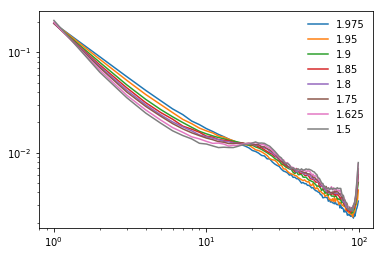

In [125]:
daf = np.arange(1,n)
for alpha in ALPHAS:
    plt.loglog(daf, sfs_xibeta[alpha], label=alpha)
plt.legend()

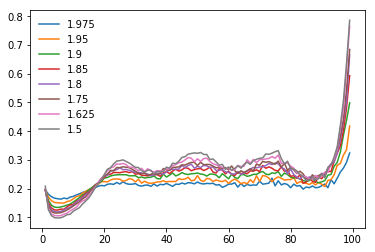

In [126]:
daf = np.arange(1,n)
for alpha in ALPHAS:
    plt.plot(daf, sfs_xibeta[alpha]*daf, label=alpha)
plt.legend()

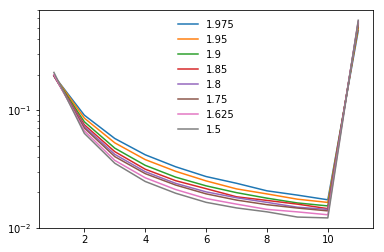

In [128]:
maxb = 10
for alpha in ALPHAS:
    plt.semilogy(daf[:maxb+1], lump_sfs(sfs_xibeta[alpha], maxb), label=alpha)
plt.legend()

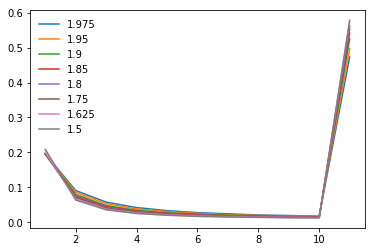

In [127]:
maxb = 10
for alpha in ALPHAS:
    plt.plot(daf[:maxb+1], lump_sfs(sfs_xibeta[alpha], maxb), label=alpha)
plt.legend()

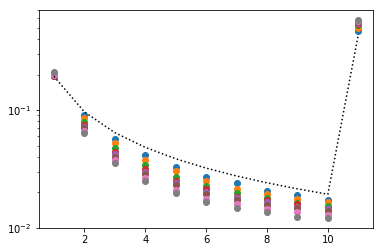

In [137]:
x = np.arange(1,12)

for alpha in ALPHAS:
    plt.semilogy(x, lump_sfs(sfs_xibeta[alpha]/np.sum(sfs_xibeta[alpha]), maxb), 'o')
plt.semilogy(x, lump_sfs(1/np.arange(1,n), maxb)/np.sum(1/np.arange(1,n)), ':k')



In [34]:
import sys
import os
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
from demographicmodel import DemographicModel


In [189]:
def plot_model(ax, model, **kwargs):
    t = np.append(model.times, model.times[-1]*2)
    y = np.append(model.sizes, model.sizes[-1])
    ax.plot(t, y, drawstyle="steps-post", **kwargs)
    return ax

In [181]:
MODELS = ['3EpochConstConst', '4EpochConst', "ConstFixedTimes", "Const2FixedTimes"]
model_dict = {}
for alpha in ALPHAS:
    for i, model in enumerate(MODELS): 
        try:
            fn = "../fastNeutrino/fitted_params/n-{}_xibeta-{}.{}.long.txt".format(n, alpha, model)
            dmodel = DemographicModel(fn)
            print(alpha, "succeded")
        except:
            print(alpha, "failed")
            fn = "../fastNeutrino/fitted_params/n-{}_xibeta-{}.{}.txt".format(n, alpha, model)
            dmodel = DemographicModel(fn)
        dmodel.rescale()
        model_dict[(alpha,model)] = dmodel
        
        try:
            fn = "../fastNeutrino/fitted_params/n-{}_xibeta-{}.{}.fromStart.txt".format(n, alpha, model)
            dmodel = DemographicModel(fn)
            dmodel.rescale()
            model_dict[(alpha,model,"fromStart")] = dmodel
        except:
            continue


1.975 failed
1.975 failed
1.975 failed
1.975 failed
1.95 failed
1.95 succeded
1.95 failed
1.95 failed
1.9 failed
1.9 succeded
1.9 failed
1.9 failed
1.85 failed
1.85 succeded
1.85 failed
1.85 failed
1.8 failed
1.8 succeded
1.8 failed
1.8 failed
1.75 failed
1.75 succeded
1.75 failed
1.75 failed
1.625 failed
1.625 failed
1.625 failed
1.625 failed


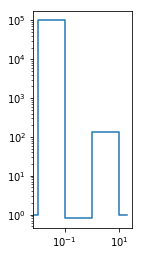

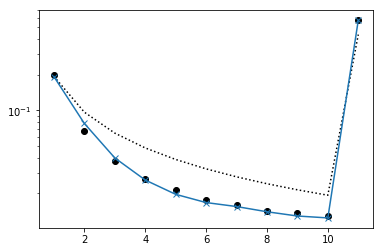

In [173]:

alpha = 1.625
model = "ConstFixedTimes"
fn = "../fastNeutrino/fitted_params/n-{}_xibeta-{}.{}.txt".format(n, alpha, model)
dmodel = DemographicModel(fn)
dmodel.rescale()
# model_dict[(alpha,model)] = dmodel
# dmodel = model_dict[(alpha,model)]
ax = plt.subplot(1,3,i+1)
plot_model(ax, dmodel)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

sims = simulate_model(dmodel, n)
sfs = get_sfs(sims)
sfs /= np.sum(sfs)

x = np.arange(1,12)
plt.plot(x, lump_sfs(sfs_xibeta[alpha]/np.sum(sfs_xibeta[alpha]), maxb), 'ok')
plt.plot(x, lump_sfs(1/np.arange(1,n), maxb)/np.sum(1/np.arange(1,n)), ':k')

plt.semilogy(x, lump_sfs(sfs,10), '-x', label=model+"_fromStart")



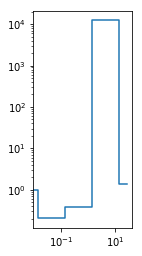

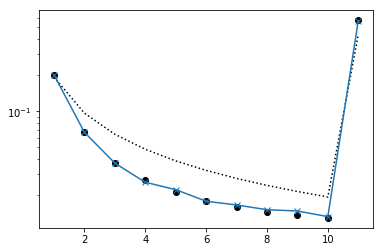

In [177]:

alpha = 1.625
model = "Const2FixedTimes"
fn = "../fastNeutrino/fitted_params/n-{}_xibeta-{}.{}.txt".format(n, alpha, model)
dmodel = DemographicModel(fn)
dmodel.rescale()
# model_dict[(alpha,model)] = dmodel
# dmodel = model_dict[(alpha,model)]
ax = plt.subplot(1,3,i+1)
plot_model(ax, dmodel)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

sims = simulate_model(dmodel, n)
sfs = get_sfs(sims)
sfs /= np.sum(sfs)

x = np.arange(1,12)
plt.plot(x, lump_sfs(sfs_xibeta[alpha]/np.sum(sfs_xibeta[alpha]), maxb), 'ok')
plt.plot(x, lump_sfs(1/np.arange(1,n), maxb)/np.sum(1/np.arange(1,n)), ':k')

plt.semilogy(x, lump_sfs(sfs,10), '-x', label=model+"_fromStart")



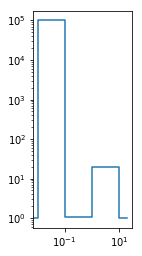

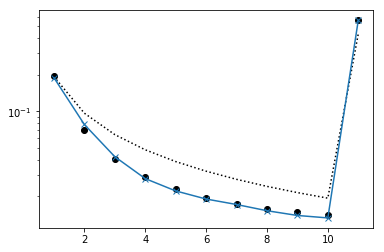

In [174]:

alpha = 1.75
model = "ConstFixedTimes"
fn = "../fastNeutrino/fitted_params/n-{}_xibeta-{}.{}.txt".format(n, alpha, model)
dmodel = DemographicModel(fn)
dmodel.rescale()
# model_dict[(alpha,model)] = dmodel
# dmodel = model_dict[(alpha,model)]
ax = plt.subplot(1,3,i+1)
plot_model(ax, dmodel)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

sims = simulate_model(dmodel, n)
sfs = get_sfs(sims)
sfs /= np.sum(sfs)

x = np.arange(1,12)
plt.plot(x, lump_sfs(sfs_xibeta[alpha]/np.sum(sfs_xibeta[alpha]), maxb), 'ok')
plt.plot(x, lump_sfs(1/np.arange(1,n), maxb)/np.sum(1/np.arange(1,n)), ':k')

plt.semilogy(x, lump_sfs(sfs,10), '-x', label=model+"_fromStart")



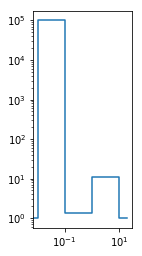

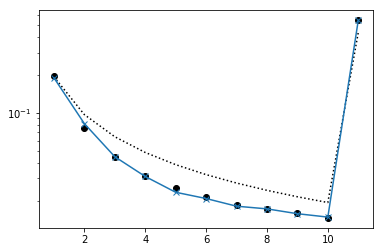

In [175]:
alpha = 1.85
model = "ConstFixedTimes"
fn = "../fastNeutrino/fitted_params/n-{}_xibeta-{}.{}.txt".format(n, alpha, model)
dmodel = DemographicModel(fn)
dmodel.rescale()
# model_dict[(alpha,model)] = dmodel
# dmodel = model_dict[(alpha,model)]
ax = plt.subplot(1,3,i+1)
plot_model(ax, dmodel)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

sims = simulate_model(dmodel, n)
sfs = get_sfs(sims)
sfs /= np.sum(sfs)

x = np.arange(1,12)
plt.plot(x, lump_sfs(sfs_xibeta[alpha]/np.sum(sfs_xibeta[alpha]), maxb), 'ok')
plt.plot(x, lump_sfs(1/np.arange(1,n), maxb)/np.sum(1/np.arange(1,n)), ':k')

plt.semilogy(x, lump_sfs(sfs,10), '-x', label=model+"_fromStart")



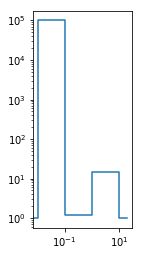

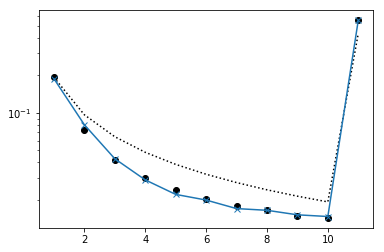

In [176]:
alpha = 1.8
model = "ConstFixedTimes"
fn = "../fastNeutrino/fitted_params/n-{}_xibeta-{}.{}.txt".format(n, alpha, model)
dmodel = DemographicModel(fn)
dmodel.rescale()
# model_dict[(alpha,model)] = dmodel
# dmodel = model_dict[(alpha,model)]
ax = plt.subplot(1,3,i+1)
plot_model(ax, dmodel)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

sims = simulate_model(dmodel, n)
sfs = get_sfs(sims)
sfs /= np.sum(sfs)

x = np.arange(1,12)
plt.plot(x, lump_sfs(sfs_xibeta[alpha]/np.sum(sfs_xibeta[alpha]), maxb), 'ok')
plt.plot(x, lump_sfs(1/np.arange(1,n), maxb)/np.sum(1/np.arange(1,n)), ':k')

plt.semilogy(x, lump_sfs(sfs,10), '-x', label=model+"_fromStart")



In [160]:
print(model_dict)

{(1.975, '3EpochConstConst'): <demographicmodel.DemographicModel object at 0x1125cc080>, (1.975, '3EpochConstConst', 'fromStart'): <demographicmodel.DemographicModel object at 0x1135ac470>, (1.975, '4EpochConst'): <demographicmodel.DemographicModel object at 0x1135ac860>, (1.95, '3EpochConstConst'): <demographicmodel.DemographicModel object at 0x1135acba8>, (1.95, '3EpochConstConst', 'fromStart'): <demographicmodel.DemographicModel object at 0x113908d68>, (1.95, '4EpochConst'): <demographicmodel.DemographicModel object at 0x1135ac978>, (1.9, '3EpochConstConst'): <demographicmodel.DemographicModel object at 0x1135acef0>, (1.9, '3EpochConstConst', 'fromStart'): <demographicmodel.DemographicModel object at 0x1135ac6a0>, (1.9, '4EpochConst'): <demographicmodel.DemographicModel object at 0x1135acda0>, (1.85, '3EpochConstConst'): <demographicmodel.DemographicModel object at 0x1135acac8>, (1.85, '3EpochConstConst', 'fromStart'): <demographicmodel.DemographicModel object at 0x1135ac5c0>, (1.85

1.975
it worked
it didn't work


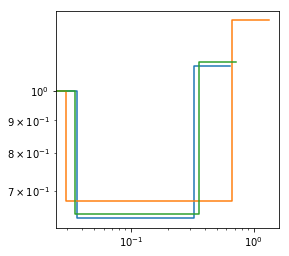

1.95
it worked
it didn't work


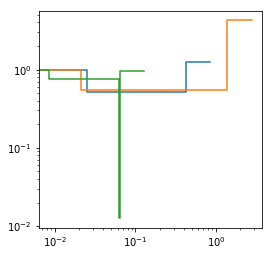

1.9
it worked
it didn't work


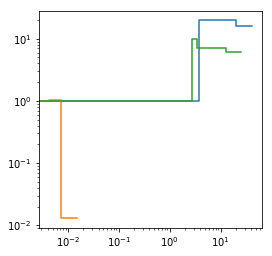

1.85
it worked
it didn't work


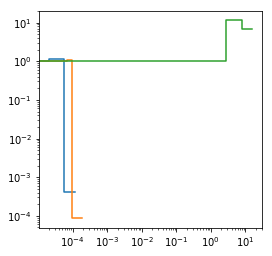

1.8
it worked
it didn't work


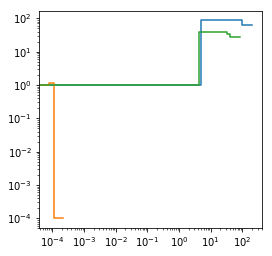

1.75
it worked
it didn't work


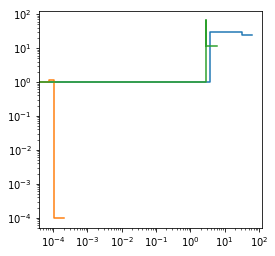

1.625
it worked
it didn't work


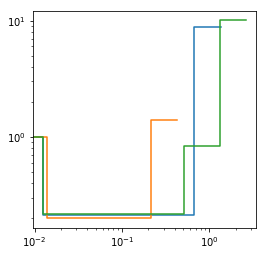

1.5
it didn't work
it didn't work


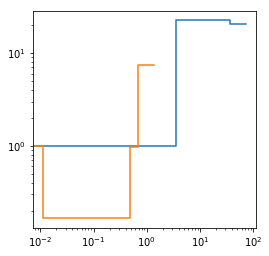

In [161]:
for alpha in ALPHAS:
    print(alpha)
    fig = plt.figure(figsize=(4,4))
#     for i, model in enumerate(MODELS): 
    ax = fig.add_subplot(1,1,1)
    for model in MODELS:
        dmodel = model_dict[(alpha,model)]
#         ax = fig.add_subplot(1,3,i+1)
        plot_model(ax, dmodel)
        try:
            dmodel = model_dict[(alpha,model,"fromStart")]
            plot_model(ax, dmodel)
            print("it worked")
        except KeyError:
            print("it didn't work")
            continue
    ax.set_yscale('log')
#     ax.set_ylim([(4/5)*1e-3, (5/4)*1e3])
    ax.set_xscale('log')
#         ax.set_xlim([(4/5)*1e-3, (5/4)*1e1])
    #     plt.plot(dmodel.times, dmodel.sizes, drawstyle="steps-post")
#         print(dmodel.times)
#         print(dmodel.sizes)
    plt.show()
#     dmodel.print_msprime_flags()


1.975


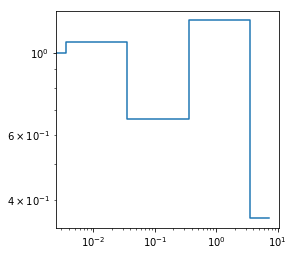

1.95


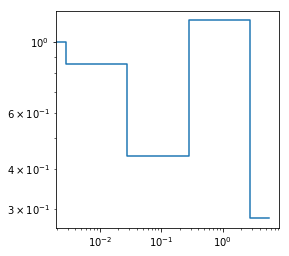

1.9


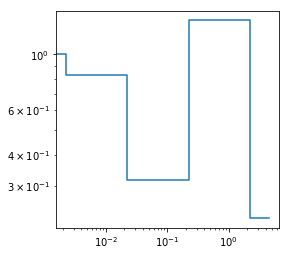

1.85


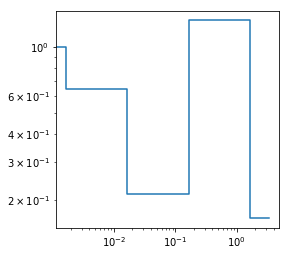

1.8


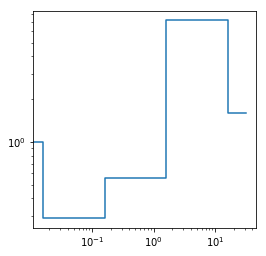

1.75


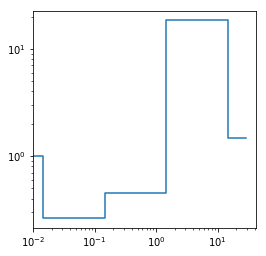

1.625


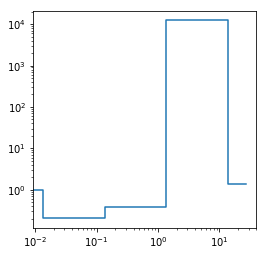

In [183]:
for alpha in ALPHAS:
    print(alpha)
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(1,1,1)
    for model in ["Const2FixedTimes"]:
        dmodel = model_dict[(alpha,model)]
        plot_model(ax, dmodel)
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.show()

1.975
1.95
1.9
1.85
1.8
1.75
1.625


(0.08, 125.0)

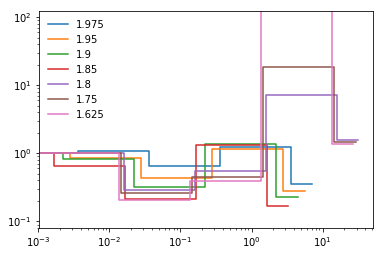

In [193]:
ax = plt.subplot(111)
for alpha in ALPHAS:
    print(alpha)
    for model in ["Const2FixedTimes"]:
        dmodel = model_dict[(alpha,model)]
        plot_model(ax, dmodel, label=alpha)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_ylim([0.08, (5/4)*100])

In [110]:
import msprime
import jsfs

In [172]:
def simulate_model(model, n, r=0.0, num_replicates=10000):
    population_configurations = [msprime.PopulationConfiguration(sample_size=n)]
    demographic_events = [msprime.PopulationParametersChange(t,initial_size=s/2.0)
                          for t, s in zip(model.times, model.sizes)]
    simulations = msprime.simulate(
                    recombination_rate=r,
                    demographic_events=demographic_events,
                    population_configurations=population_configurations,
                    num_replicates=num_replicates,
                    Ne=1.0/2.0)
    return simulations

def get_sfs(simulations):
    return np.mean([jsfs.get_sfs(rep) for rep in simulations], axis=0)

In [164]:
x = np.arange(1,n)
# simulation_dict = {}
sfs_dict = {}
for alpha in ALPHAS:
    print(alpha)
    for model in MODELS: 
        print(model)
        dmodel = model_dict[(alpha,model)]
        sims = simulate_model(dmodel, n)
        sfs_dict[(alpha, model)] = get_sfs(sims)
        try:
            dmodel = model_dict[(alpha,model,"fromStart")]
            print("fromStart")
            sims = simulate_model(dmodel, n)
            sfs_dict[(alpha, model,"fromStart")] = get_sfs(sims)
        except KeyError:
#             print("it didn't work")
            continue


#         plt.loglog(x, get_sfs(sims))
#     plt.show()

1.975
3EpochConstConst
fromStart
4EpochConst
1.95
3EpochConstConst
fromStart
4EpochConst
1.9
3EpochConstConst
fromStart
4EpochConst
1.85
3EpochConstConst
fromStart
4EpochConst
1.8
3EpochConstConst
fromStart
4EpochConst
1.75
3EpochConstConst
fromStart
4EpochConst
1.625
3EpochConstConst
fromStart
4EpochConst
1.5
3EpochConstConst
4EpochConst


1.975


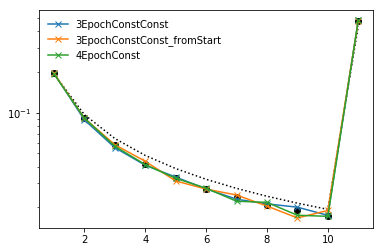

1.95


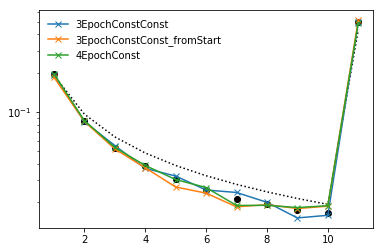

1.9


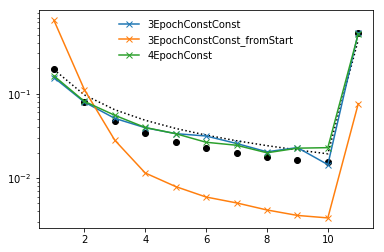

1.85


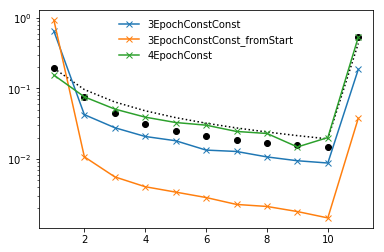

1.8


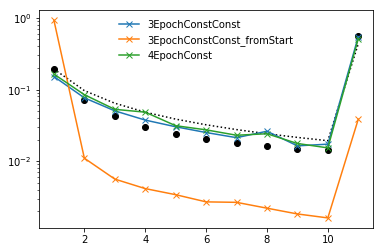

1.75


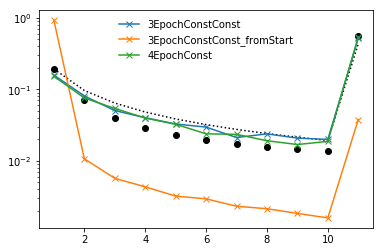

1.625


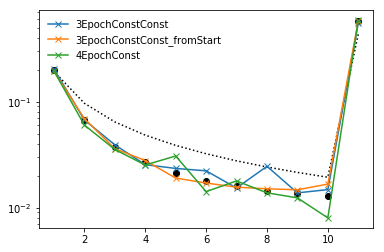

1.5


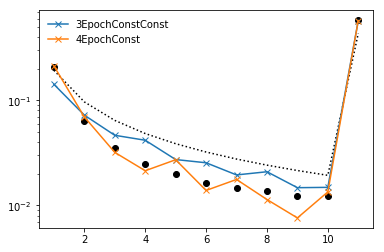

In [166]:
x = np.arange(1,12)

for alpha in ALPHAS:
    print(alpha)
    fig = plt.figure()# figsize=(10,3))
    plt.plot(x, lump_sfs(sfs_xibeta[alpha]/np.sum(sfs_xibeta[alpha]), maxb), 'ok')
    plt.plot(x, lump_sfs(1/np.arange(1,n), maxb)/np.sum(1/np.arange(1,n)), ':k')
    for i, model in enumerate(MODELS): 
        sfs = sfs_dict[(alpha,model)]
        sfs /= np.sum(sfs)
        plt.semilogy(x, lump_sfs(sfs,10), '-x', label=model)
        try:
            sfs = sfs_dict[(alpha,model,"fromStart")]
        except KeyError:
            continue
        sfs /= np.sum(sfs)
        plt.semilogy(x, lump_sfs(sfs,10), '-x', label=model+"_fromStart")

    plt.legend()
    plt.show()


In [187]:
for alpha in ALPHAS:
    print(alpha)
    for model in ["Const2FixedTimes"]: 
        print(model)
        dmodel = model_dict[(alpha,model)]
        sims = simulate_model(dmodel, n)
        sfs_dict[(alpha, model)] = get_sfs(sims)

1.975
Const2FixedTimes
1.95
Const2FixedTimes
1.9
Const2FixedTimes
1.85
Const2FixedTimes
1.8
Const2FixedTimes
1.75
Const2FixedTimes
1.625
Const2FixedTimes


1.975
0.20627241637642257
0.20871201772017348


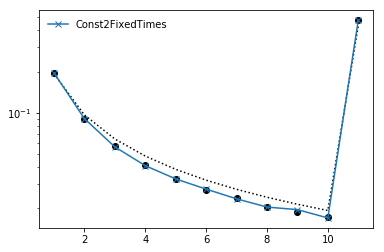

1.95
0.2132411825407078
0.21714841026074905


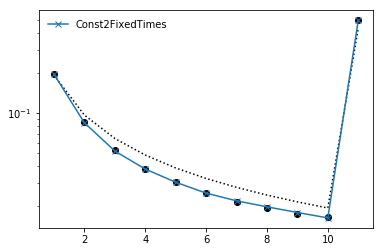

1.9
0.2218739083624075
0.2260328446486842


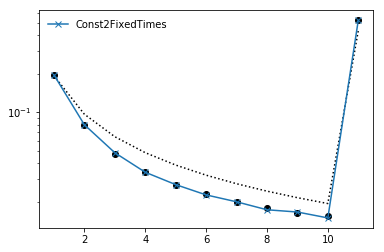

1.85
0.22757760796938165
0.23127415232478946


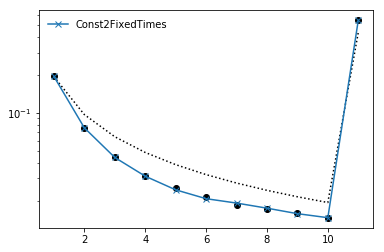

1.8
0.23068067534960368
0.23059845414958685


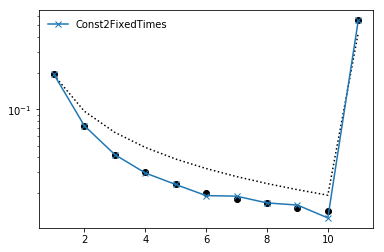

1.75
0.23340030843501214
0.2382310902867224


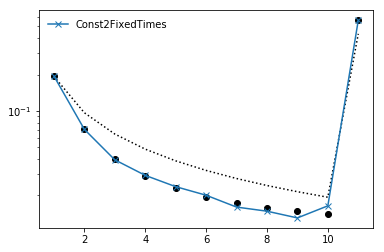

1.625
0.2377999992212237
0.23679880933033126


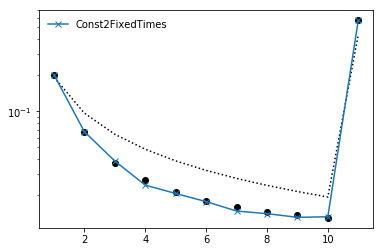

In [197]:
x = np.arange(1,12)

for alpha in ALPHAS:
    print(alpha)
    fig = plt.figure()# figsize=(10,3))
    plt.plot(x, lump_sfs(sfs_xibeta[alpha]/np.sum(sfs_xibeta[alpha]), maxb), 'ok')
    print(h.sfs2pi((sfs_xibeta[alpha] + sfs_xibeta[alpha][::-1])[:50], 100))
    plt.plot(x, lump_sfs(1/np.arange(1,n), maxb)/np.sum(1/np.arange(1,n)), ':k')
    for i, model in enumerate(["Const2FixedTimes"]): 
        sfs = sfs_dict[(alpha,model)]
        print(h.sfs2pi((sfs + sfs[::-1])[:50], 100))
        sfs /= np.sum(sfs)
        plt.semilogy(x, lump_sfs(sfs,10), '-x', label=model)
    plt.legend()
    plt.show()


In [6]:
print(times, sizes)
plt.loglog(list(times) + [5.0] , list(sizes) + [sizes[-1]], drawstyle="steps-post")
plt.xlim([1/500, 5])
plt.ylim([1/12,12])
plt.ylabel('Relative size, $N(t)/N_0$')
plt.xlabel('Time ($t / N_0)$')

NameError: name 'times' is not defined

Text(0.5, 0, 'Derived allele count')

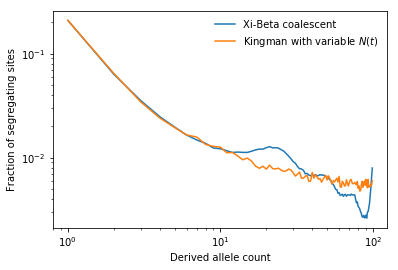

In [7]:
plt.loglog(np.arange(1,n), sfs_xibeta/np.sum(sfs_xibeta), label="Xi-Beta coalescent")
plt.loglog(np.arange(1,n), sfs_kingman/np.sum(sfs_kingman), label="Kingman with variable $N(t)$")
plt.legend()
plt.ylabel("Fraction of segregating sites")
plt.xlabel("Derived allele count")

In [8]:
lump_cutoff = 10
lumped_sfs_xibeta = lump_sfs(sfs_xibeta, lump_cutoff)
lumped_sfs_kingman = lump_sfs(sfs_kingman, lump_cutoff)
lumped_2sfs_xibeta = lump_2sfs(twosfs_xibeta, lump_cutoff)
lumped_2sfs_kingman = lump_2sfs(twosfs_kingman, lump_cutoff)

In [9]:
print(np.min(lumped_2sfs_kingman))

2.7909543861620327e-05


In [10]:
pmi_xibeta = np.log2(lumped_2sfs_xibeta / (lumped_sfs_xibeta[:,None]*lumped_sfs_xibeta[None,:]))
pmi_kingman = np.log2(lumped_2sfs_kingman / (lumped_sfs_kingman[:,None]*lumped_sfs_kingman[None,:]))

Text(0.5, 0, 'Derived allele count')

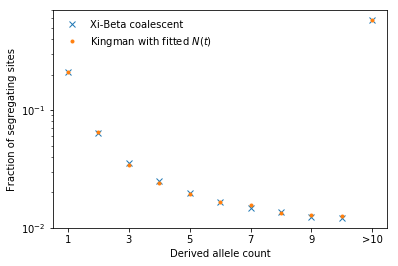

In [11]:
ax = plt.subplot(111)
ax.semilogy(np.arange(1,12), lumped_sfs_xibeta, 'x', label="Xi-Beta coalescent")
ax.semilogy(np.arange(1,12), lumped_sfs_kingman, '.', label="Kingman with fitted $N(t)$")
ax.set_xticks([1,3,5,7,9,11])
ax.set_xticklabels([1,3,5,7,9,">10"])
plt.legend()
plt.ylabel("Fraction of segregating sites")
plt.xlabel("Derived allele count")

In [12]:
kldiv(lumped_2sfs_kingman, lumped_2sfs_xibeta)

0.3999480538827186

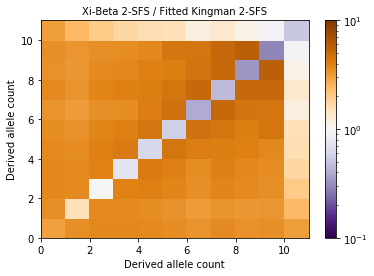

In [13]:
import matplotlib.colors as colors
plt.pcolormesh(lumped_2sfs_xibeta/lumped_2sfs_kingman,
               norm=colors.LogNorm(vmin=0.1, vmax=10),
               cmap="PuOr_r")
plt.ylabel("Derived allele count")
plt.xlabel("Derived allele count")
plt.title("Xi-Beta 2-SFS / Fitted Kingman 2-SFS")
plt.colorbar()

In [14]:
print(kldiv(lumped_2sfs_kingman, lumped_2sfs_xibeta))

0.3999480538827186


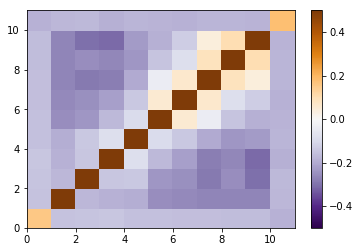

In [15]:
plt.pcolormesh(pmi_xibeta, vmin=-0.5, vmax=0.5, cmap='PuOr_r')
plt.colorbar()

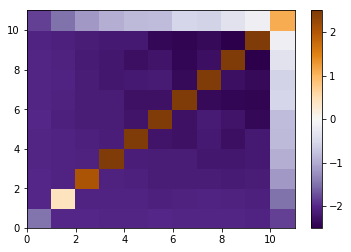

In [16]:
plt.pcolormesh(pmi_kingman, vmin=-2.5, vmax=2.5, cmap='PuOr_r')
plt.colorbar()

In [17]:
xibeta_fn = "../simulations/msprime/jsfs_n-{}_xibeta-{}_r-1.0.txt".format(n, alpha)
kingman_fn = "../simulations/msprime/jsfs_fastNeutrino-xibeta_n-{}_alpha-{}_{}_r-3.0.txt".format(n,alpha,model)

sfs_xibeta, twosfs_xibeta, _, _ = readsim(xibeta_fn)
sfs_kingman, twosfs_kingman, times, sizes = readsim(kingman_fn)

lumped_sfs_xibeta = lump_sfs(sfs_xibeta, lump_cutoff)
lumped_sfs_kingman = lump_sfs(sfs_kingman, lump_cutoff)
lumped_2sfs_xibeta = lump_2sfs(twosfs_xibeta, lump_cutoff)
lumped_2sfs_kingman = lump_2sfs(twosfs_kingman, lump_cutoff)

#N_SAMPLES=100
#N_LOCI=100000
#Tc=1
#SFS_FROM=TREES
#RECOMBINATION_RATE=1.0
#GROWTH_RATE=0.0
#ALPHA=2.0
#N_SAMPLES=100
#N_LOCI=100000
#Tc=1
#SFS_FROM=TREES
#RECOMBINATION_RATE=3.0
#GROWTH_RATE=0.0
#ALPHA=2.0
#DEMOCHANGE_TIMES=0.0,0.011344741692743894,0.4766063224638619,0.6913860170475844
#DEMOCHANGE_SIZES=1.0,0.1662508802089224,0.9772907335993951,7.468952737961113


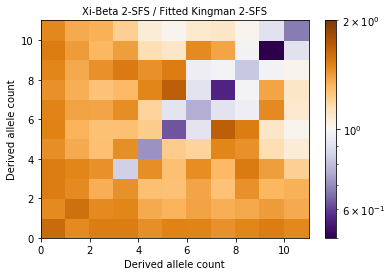

In [18]:
plt.pcolormesh(lumped_2sfs_xibeta/lumped_2sfs_kingman,
               norm=colors.LogNorm(vmin=0.5, vmax=2),
               cmap="PuOr_r")
plt.ylabel("Derived allele count")
plt.xlabel("Derived allele count")
plt.title("Xi-Beta 2-SFS / Fitted Kingman 2-SFS")
plt.colorbar()

In [19]:
print(kldiv(lumped_2sfs_kingman, lumped_2sfs_xibeta))

0.09691475273919559


In [20]:
RS = np.insert(np.logspace(-1, 3, 13), 0, 0.0)
print(3*RS)
n_rs = 8
kldivs = np.zeros(n_rs)
for i, r in enumerate(RS[:n_rs]):
    xibeta_fn = "../simulations/msprime/jsfs_n-{}_xibeta-{}_r-{}.txt".format(n, alpha, r)
    kingman_fn = "../simulations/msprime/jsfs_fastNeutrino-xibeta_n-{}_alpha-{}_{}_r-{}.txt".format(n,alpha,model,3*r)

    sfs_xibeta, twosfs_xibeta, _, _ = readsim(xibeta_fn)
    try:
        sfs_kingman, twosfs_kingman, times, sizes = readsim(kingman_fn)

        lumped_2sfs_xibeta = lump_2sfs(twosfs_xibeta, lump_cutoff)
        lumped_2sfs_kingman = lump_2sfs(twosfs_kingman, lump_cutoff)
    
        kldivs[i] = kldiv(lumped_2sfs_kingman, lumped_2sfs_xibeta)
    except:
        pass

[0.00000000e+00 3.00000000e-01 6.46330407e-01 1.39247665e+00
 3.00000000e+00 6.46330407e+00 1.39247665e+01 3.00000000e+01
 6.46330407e+01 1.39247665e+02 3.00000000e+02 6.46330407e+02
 1.39247665e+03 3.00000000e+03]
#N_SAMPLES=100
#N_LOCI=100000
#Tc=1
#SFS_FROM=TREES
#RECOMBINATION_RATE=0.0
#GROWTH_RATE=0.0
#ALPHA=2.0
#N_SAMPLES=100
#N_LOCI=100000
#Tc=1
#SFS_FROM=TREES
#RECOMBINATION_RATE=0.0
#GROWTH_RATE=0.0
#ALPHA=2.0
#DEMOCHANGE_TIMES=0.0,0.011344741692743894,0.4766063224638619,0.6913860170475844
#DEMOCHANGE_SIZES=1.0,0.1662508802089224,0.9772907335993951,7.468952737961113
#N_SAMPLES=100
#N_LOCI=100000
#Tc=1
#SFS_FROM=TREES
#RECOMBINATION_RATE=0.1
#GROWTH_RATE=0.0
#ALPHA=2.0
#N_SAMPLES=100
#N_LOCI=100000
#Tc=1
#SFS_FROM=TREES
#RECOMBINATION_RATE=0.30000000000000004
#GROWTH_RATE=0.0
#ALPHA=2.0
#DEMOCHANGE_TIMES=0.0,0.011344741692743894,0.4766063224638619,0.6913860170475844
#DEMOCHANGE_SIZES=1.0,0.1662508802089224,0.9772907335993951,7.468952737961113
#N_SAMPLES=100
#N_LOCI=100000
#Tc=1

Text(0.5, 1.0, 'Xi-Beta vs. Kingman 2-SFS')

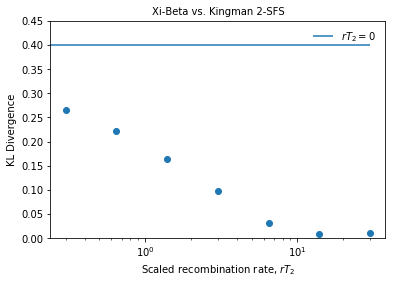

In [21]:
plt.semilogx(3*RS[:8], kldivs, 'o')
plt.hlines(kldivs[0], 0, 30, color="C0", label="$r T_2=0$")
plt.ylim([0,0.45])
plt.legend()
plt.ylabel("KL Divergence")
plt.xlabel("Scaled recombination rate, $r T_2$")
plt.title("Xi-Beta vs. Kingman 2-SFS")